### Python机器学习

##### 1 赋予计算机学习数据的能力

* 机器学习的基本概念
* 机器学习的三种类型与基本术语
* 构建机器学习所需要的系统模块

###### 1.1 机器学习的类型

- 监督学习

- 无监督学习

- 强化学习

##### 1.2 数据降维

数据降维（dimensionality reduction）是无监督学习的另一个子领域。通常，我们面对的数据都是高维的（每一次采样都会获取大量的样本值），这就对有限的数据存储空间以及机器学习算法性能提出了挑战。无监督降维是数据特征预处理时常用的技术，用于清除数据中的噪声，它能够在最大程度保留相关信息的 情况下将数据压缩到一个维度较小的子空间，但同时也可能会降低某些算法在准确性方面的性能。

##### 2 机器学习分类算法

Mainly：感知机与自适应线性神经元

In [2]:
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data')
df.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


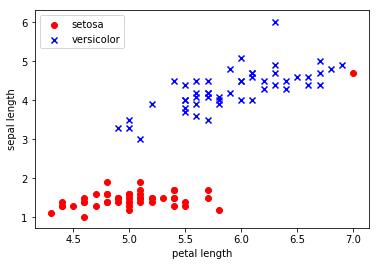

In [14]:
import matplotlib.pyplot as plt
import numpy as np

y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)
X = df.iloc[0:100, [0, 2]].values

plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')

plt.xlabel('petal length')
plt.ylabel('sepal length')
plt.legend(loc='upper left')
plt.show()

In [29]:
w_ = np.zeros(1 + X.shape[1])

def net_input(X):
    """ Calculate net input """
    return np.dot(X, w_[1:]) + w_[0]

def predict(X):
    """ Return class label after unit step """
    return np.where(net_input(X) >= 0.0, 1, -1)
    
errors = 0
for xi, target in zip(X, y):
    update = 0.01 * (target - predict(xi))
    w_[1:] += update * xi
    w_[0] += update
    errors += int(update == 0)

print(w_)
print(errors)

[ 0.     0.042  0.066]
98


In [17]:
# 感知器实现
class Perceptron(object):
    """ Perceptron classifer
    
    Parameters
    ----------
    eta : float
        Learning rate (between 0 and 1)
        
    n_iter : int
        Passes over the training dataset
        
    Attributes
    ----------
    w_ : 1d-array
        Weights after fitting
        
    errors_ : list
        Number of misclassfications in every epoch
    
    """
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter
        
    def fit(self, X, y):
        """ Fitting training data
        
        Parameters
        ----------
        X : array-like, shape = [n_samples, n_features]
        
        y : array-like, shape = [n_samples]
        """
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
                
            self.errors_.append(errors)
            
        return self
            
    def net_input(self, X):
        """ Calculate net input """
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        """ Return class label after unit step """
        return np.where(self.net_input(X) >= 0.0, 1, -1)
    

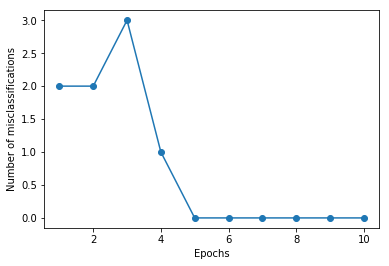

In [18]:
# 是否收敛
ppn = Perceptron(eta=0.01, n_iter=10)
ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()

In [ ]:
# 自适应线性神经元
class AdalineGD(object):
    """ Adaptive linear neuron classifier 
    
    Parameters
    ----------
    eta : float
        Learning rate (between 0 and 1)
        
    n_iter : int
        Passes over the training dataset
        
    Attributes
    ----------
    w_ : 1d-array
        Weights after fitting
        
    cost_ : list
        Number of misclassfications in every epoch
        
    """
    def __init__(self, eta, n_iter):
        self.eta = eta
        self.n_iter = n_iter
        
    def fit(self, X, y):
        """ Fit training data
        
        Parameters
        ----------
        X : array-like
        y : array-like
        
        Return
        ------
        self : object
        
        """
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []
        
        for _ in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
        
    def net_input(self, X):
        """ Calculate net input """
        return np.dot(X, self.w_[1:]) + self.w_[0]